1-test
amount_of_layers=1
size_of_layers=256
eta=0.01
optimization=Adam
loss_function=softmax_cross_entropy_with_logits
batch_size=100
amount_of_epochs=10
activation_functions=relu
dropout=0.5
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

Validation accuracy for epoch 1 is: 0.7833999991416931
Validation loss for epoch 1 is: 1.0461674928665161
Train accuracy for epoch 1 is: 0.772636353969574
Train loss for epoch 1 is: 1.0015031099319458
Validation accuracy for epoch 2 is: 0.8277999758720398
Validation loss for epoch 2 is: 0.715768039226532
Train accuracy for epoch 2 is: 0.8217818140983582
Train loss for epoch 2 is: 0.6602864861488342
Validation accuracy fo

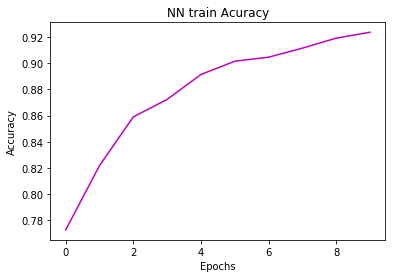

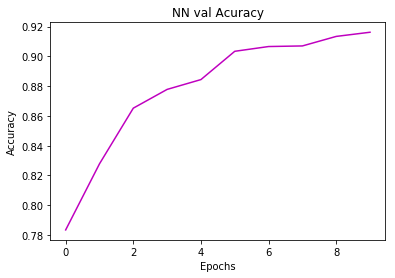

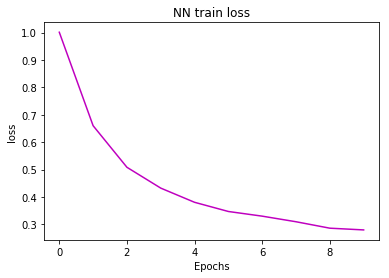

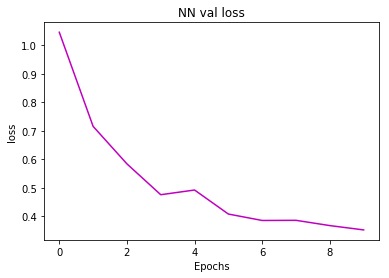

Accuracy for Entire test set: 0.9574000239372253


In [2]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import cv2
import scipy
import sys
import math
from scipy import ndimage
from IPython.display import display
from PIL import Image
 
    
print('1-test')
print('amount_of_layers=1')
print('size_of_layers=256')
print('eta=0.01')
print('optimization=Adam')
print('loss_function=softmax_cross_entropy_with_logits')
print('batch_size=100')
print('amount_of_epochs=10')
print('activation_functions=relu')
print('dropout=0.5')
def getBestShift(img):
    cy,cx = ndimage.measurements.center_of_mass(img)

    rows,cols = img.shape
    shiftx = np.round(cols/2.0-cx).astype(int)
    shifty = np.round(rows/2.0-cy).astype(int)

    return shiftx,shifty


def shift(img,sx,sy):
    rows,cols = img.shape
    M = np.float32([[1,0,sx],[0,1,sy]])
    shifted = cv2.warpAffine(img,M,(cols,rows))
    return shifted


#weight initalization func
def weight_variable(shape):
    initial= tf.truncated_normal(shape)
    return tf.Variable(initial)
#def bias_variable(shape):
 #   initial= tf.truncated_normal(shape)
    #initial= tf.constant(0.1,shape=shape)
  #  return tf.Variable(initial)
#load and set the data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)
n_input = 784
n_output = 10
net_input = tf.placeholder(tf.float32, [None, n_input])
y_true = tf.placeholder(tf.float32, [None, n_output])
keep_prob = tf.placeholder(tf.float32)

#build the model
#keep_prob_input= tf.placeholder(tf.float32)
#x_drop= tf.nn.dropout(net_input,keep_prob=keep_prob_input)
##add layers

hidden_size = 256
W_fc1= weight_variable([n_input,hidden_size])
b_fc1= weight_variable([hidden_size])
h_fc1= tf.nn.relu(tf.matmul(net_input,W_fc1)+b_fc1)
h_fc1_drop=tf.nn.dropout(h_fc1,keep_prob)


W_fc2 = weight_variable([hidden_size, n_output])
b_fc2 = weight_variable([n_output])
net_output=(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)
#define accuracy
correct_prediction= tf.equal(tf.argmax(net_output, 1), tf.argmax(y_true, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=net_output, labels=y_true))
#define loss function and optimization
eta = 0.01 
optimizer = tf.train.AdamOptimizer(eta).minimize(cost)
#train the model
sess = tf.Session()
sess.run(tf.global_variables_initializer())
l_loss_tr = list()
l_acc_tr = list()
l_loss_val = list()
l_acc_val = list()
batch_size=100
n_epochs=10
keep_prob=keep_prob
for epoch_i in range(n_epochs):
    for batch_i in range(0, mnist.train.num_examples, batch_size):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={
            net_input: batch_xs,
            y_true: batch_ys,keep_prob:0.5
        })
    acc_val = sess.run(accuracy,feed_dict={
                       net_input: mnist.validation.images,
                       y_true: mnist.validation.labels,keep_prob:0.5 })
    print('Validation accuracy for epoch {} is: {}'.format(epoch_i + 1, acc_val))
    loss_val = sess.run(cost,feed_dict={
                       net_input: mnist.validation.images,
                       y_true: mnist.validation.labels,keep_prob:0.5 })
    print('Validation loss for epoch {} is: {}'.format(epoch_i + 1, loss_val))
    acc_tr = sess.run(accuracy,feed_dict={
                       net_input: mnist.train.images,
                       y_true: mnist.train.labels,keep_prob:0.5 })
    print('Train accuracy for epoch {} is: {}'.format(epoch_i + 1, acc_tr))
    loss_tr = sess.run(cost,feed_dict={
                       net_input: mnist.train.images,
                       y_true: mnist.train.labels,keep_prob:0.5 })
    print('Train loss for epoch {} is: {}'.format(epoch_i + 1, loss_tr))
    l_loss_tr.append(loss_tr)
    l_acc_tr.append(acc_tr)
    l_loss_val.append(loss_val)
    l_acc_val.append(acc_val)
    
    
#visual presentation of training
plt.title('NN train Acuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.plot(l_acc_tr, color='m')
plt.show()

plt.title('NN val Acuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.plot(l_acc_val, color='m')
plt.show()

#visual presentation of training
plt.title('NN train loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.plot(l_loss_tr, color='m')
plt.show()


#visual presentation of training
plt.title('NN val loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.plot(l_loss_val, color='m')
plt.show()

print("Accuracy for Entire test set: {}".format(sess.run(accuracy,
               feed_dict={
                   net_input: mnist.test.images,
                   y_true: mnist.test.labels,keep_prob:1.0
               })))

3-test
amount_of_layers=2
size_of_layers=256,256
eta=0.01
optimization=Adam
loss_function=softmax_cross_entropy_with_logits
batch_size=100
amount_of_epochs=10
activation_functions=relu
dropout=0.5
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Validation accuracy for epoch 1 is: 0.6815999746322632
Validation loss for epoch 1 is: 13.248309135437012
Train accuracy for epoch 1 is: 0.667127251625061
Train loss for epoch 1 is: 14.280728340148926
Validation accuracy for epoch 2 is: 0.7414000034332275
Validation loss for epoch 2 is: 7.750858783721924
Train accuracy for epoch 2 is: 0.7275636196136475
Train loss for epoch 2 is: 8.413456916809082
Validation accuracy for epoch 3 is: 0.7634000182151794
Validation loss for epoch 3 is: 6.010416030883789
Train accuracy for epoch 3 is: 0.751836359500885
Train loss for epoch 3 is: 5.954264163970947
Validatio

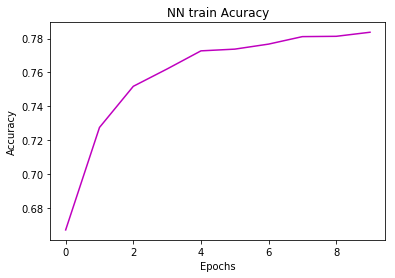

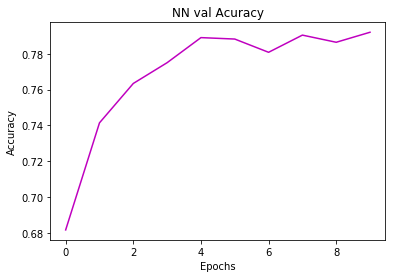

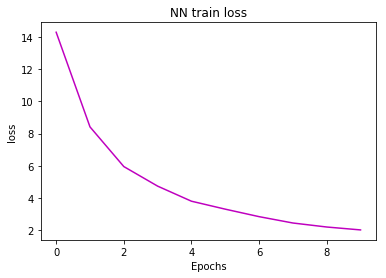

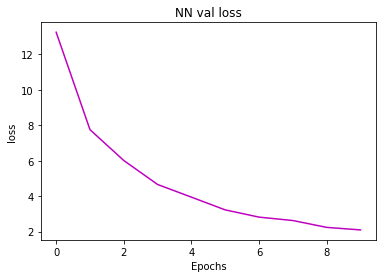

Accuracy for Entire test set: 0.8902999758720398


In [5]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import cv2
import scipy
import sys
import math
from scipy import ndimage
from IPython.display import display
from PIL import Image
 
    
print('3-test')
print('amount_of_layers=2')
print('size_of_layers=256,256')
print('eta=0.01')
print('optimization=Adam')
print('loss_function=softmax_cross_entropy_with_logits')
print('batch_size=100')
print('amount_of_epochs=10')
print('activation_functions=relu')
print('dropout=0.5')
def getBestShift(img):
    cy,cx = ndimage.measurements.center_of_mass(img)

    rows,cols = img.shape
    shiftx = np.round(cols/2.0-cx).astype(int)
    shifty = np.round(rows/2.0-cy).astype(int)

    return shiftx,shifty


def shift(img,sx,sy):
    rows,cols = img.shape
    M = np.float32([[1,0,sx],[0,1,sy]])
    shifted = cv2.warpAffine(img,M,(cols,rows))
    return shifted


#weight initalization func
def weight_variable(shape):
    initial= tf.truncated_normal(shape)
    return tf.Variable(initial)
#def bias_variable(shape):
 #   initial= tf.truncated_normal(shape)
    #initial= tf.constant(0.1,shape=shape)
  #  return tf.Variable(initial)
#load and set the data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)
n_input = 784
n_output = 10
net_input = tf.placeholder(tf.float32, [None, n_input])
net_input2 = tf.placeholder(tf.float32, [None, 256])
y_true = tf.placeholder(tf.float32, [None, n_output])
keep_prob = tf.placeholder(tf.float32)

#build the model
#keep_prob_input= tf.placeholder(tf.float32)
#x_drop= tf.nn.dropout(net_input,keep_prob=keep_prob_input)
##add layers

hidden_size = 256
W_fc1= weight_variable([n_input,hidden_size])
b_fc1= weight_variable([hidden_size])
h_fc1= tf.nn.relu(tf.matmul(net_input,W_fc1)+b_fc1)
h_fc1_drop=tf.nn.dropout(h_fc1,keep_prob)

hidden_size2 = 256
W_fc3= weight_variable([hidden_size,hidden_size2])
b_fc3= weight_variable([hidden_size2])
h_fc3= tf.nn.relu(tf.matmul(net_input2,W_fc3)+b_fc3)
h_fc3_drop=tf.nn.dropout(h_fc3,keep_prob=1)


W_fc2 = weight_variable([hidden_size2, n_output])
b_fc2 = weight_variable([n_output])
net_output=(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)
#define accuracy
correct_prediction= tf.equal(tf.argmax(net_output, 1), tf.argmax(y_true, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=net_output, labels=y_true))
#define loss function and optimization
eta = 0.01 
optimizer = tf.train.GradientDescentOptimizer(eta).minimize(cost)
#train the model
sess = tf.Session()
sess.run(tf.global_variables_initializer())
l_loss_tr = list()
l_acc_tr = list()
l_loss_val = list()
l_acc_val = list()
batch_size=100
n_epochs=10
keep_prob=keep_prob
for epoch_i in range(n_epochs):
    for batch_i in range(0, mnist.train.num_examples, batch_size):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={
            net_input: batch_xs,
            y_true: batch_ys,keep_prob:0.5
        })
    acc_val = sess.run(accuracy,feed_dict={
                       net_input: mnist.validation.images,
                       y_true: mnist.validation.labels,keep_prob:0.5 })
    print('Validation accuracy for epoch {} is: {}'.format(epoch_i + 1, acc_val))
    loss_val = sess.run(cost,feed_dict={
                       net_input: mnist.validation.images,
                       y_true: mnist.validation.labels,keep_prob:0.5 })
    print('Validation loss for epoch {} is: {}'.format(epoch_i + 1, loss_val))
    acc_tr = sess.run(accuracy,feed_dict={
                       net_input: mnist.train.images,
                       y_true: mnist.train.labels,keep_prob:0.5 })
    print('Train accuracy for epoch {} is: {}'.format(epoch_i + 1, acc_tr))
    loss_tr = sess.run(cost,feed_dict={
                       net_input: mnist.train.images,
                       y_true: mnist.train.labels,keep_prob:0.5 })
    print('Train loss for epoch {} is: {}'.format(epoch_i + 1, loss_tr))
    l_loss_tr.append(loss_tr)
    l_acc_tr.append(acc_tr)
    l_loss_val.append(loss_val)
    l_acc_val.append(acc_val)
    
    
#visual presentation of training
plt.title('NN train Acuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.plot(l_acc_tr, color='m')
plt.show()

plt.title('NN val Acuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.plot(l_acc_val, color='m')
plt.show()

#visual presentation of training
plt.title('NN train loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.plot(l_loss_tr, color='m')
plt.show()


#visual presentation of training
plt.title('NN val loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.plot(l_loss_val, color='m')
plt.show()

print("Accuracy for Entire test set: {}".format(sess.run(accuracy,
               feed_dict={
                   net_input: mnist.test.images,
                   y_true: mnist.test.labels,keep_prob:1.0
               })))

4-test
amount_of_layers=2
size_of_layers=256,256
eta=0.01
optimization=Adam
loss_function=softmax_cross_entropy_with_logits
batch_size=100
amount_of_epochs=50
activation_functions=relu
dropout=0.5
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Validation accuracy for epoch 1 is: 0.7552000284194946
Validation loss for epoch 1 is: 1.051437258720398
Train accuracy for epoch 1 is: 0.7439272999763489
Train loss for epoch 1 is: 1.0543593168258667
Validation accuracy for epoch 2 is: 0.823199987411499
Validation loss for epoch 2 is: 0.6987188458442688
Train accuracy for epoch 2 is: 0.8168545365333557
Train loss for epoch 2 is: 0.6922475099563599
Validation accuracy for epoch 3 is: 0.8496000170707703
Validation loss for epoch 3 is: 0.5930122137069702
Train accuracy for epoch 3 is: 0.8477272987365723
Train loss for epoch 3 is: 0.5272652506828308
Valid

Validation accuracy for epoch 39 is: 0.9359999895095825
Validation loss for epoch 39 is: 0.33588749170303345
Train accuracy for epoch 39 is: 0.9506545662879944
Train loss for epoch 39 is: 0.2118014544248581
Validation accuracy for epoch 40 is: 0.9434000253677368
Validation loss for epoch 40 is: 0.3416760563850403
Train accuracy for epoch 40 is: 0.9521454572677612
Train loss for epoch 40 is: 0.17154639959335327
Validation accuracy for epoch 41 is: 0.9395999908447266
Validation loss for epoch 41 is: 0.35723963379859924
Train accuracy for epoch 41 is: 0.9555636644363403
Train loss for epoch 41 is: 0.17671924829483032
Validation accuracy for epoch 42 is: 0.9458000063896179
Validation loss for epoch 42 is: 0.3349147439002991
Train accuracy for epoch 42 is: 0.9509272575378418
Train loss for epoch 42 is: 0.18810488283634186
Validation accuracy for epoch 43 is: 0.9390000104904175
Validation loss for epoch 43 is: 0.3310149312019348
Train accuracy for epoch 43 is: 0.9494545459747314
Train loss f

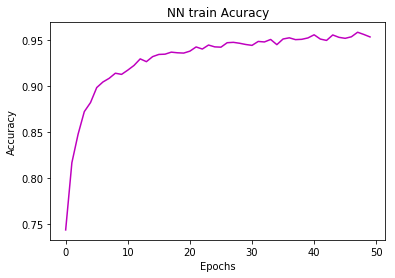

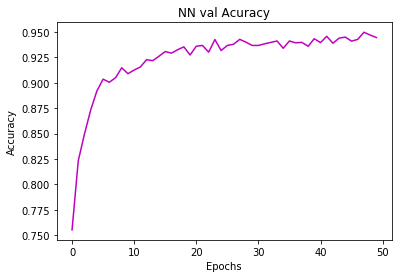

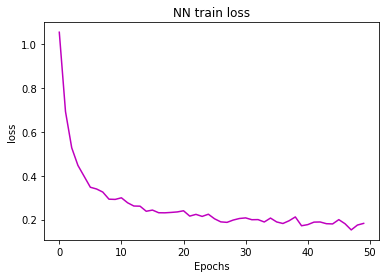

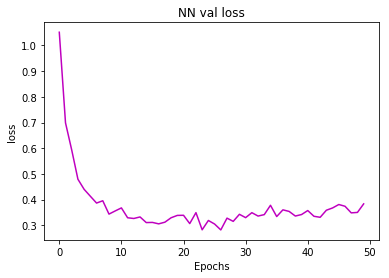

Accuracy for Entire test set: 0.9700000286102295


In [4]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import cv2
import scipy
import sys
import math
from scipy import ndimage
from IPython.display import display
from PIL import Image
 
    
print('4-test')
print('amount_of_layers=2')
print('size_of_layers=256,256')
print('eta=0.01')
print('optimization=Adam')
print('loss_function=softmax_cross_entropy_with_logits')
print('batch_size=100')
print('amount_of_epochs=50')
print('activation_functions=relu')
print('dropout=0.5')
def getBestShift(img):
    cy,cx = ndimage.measurements.center_of_mass(img)

    rows,cols = img.shape
    shiftx = np.round(cols/2.0-cx).astype(int)
    shifty = np.round(rows/2.0-cy).astype(int)

    return shiftx,shifty


def shift(img,sx,sy):
    rows,cols = img.shape
    M = np.float32([[1,0,sx],[0,1,sy]])
    shifted = cv2.warpAffine(img,M,(cols,rows))
    return shifted


#weight initalization func
def weight_variable(shape):
    initial= tf.truncated_normal(shape)
    return tf.Variable(initial)
#def bias_variable(shape):
 #   initial= tf.truncated_normal(shape)
    #initial= tf.constant(0.1,shape=shape)
  #  return tf.Variable(initial)
#load and set the data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)
n_input = 784
n_output = 10
net_input = tf.placeholder(tf.float32, [None, n_input])
net_input2 = tf.placeholder(tf.float32, [None, 256])
y_true = tf.placeholder(tf.float32, [None, n_output])
keep_prob = tf.placeholder(tf.float32)

#build the model
#keep_prob_input= tf.placeholder(tf.float32)
#x_drop= tf.nn.dropout(net_input,keep_prob=keep_prob_input)
##add layers

hidden_size = 256
W_fc1= weight_variable([n_input,hidden_size])
b_fc1= weight_variable([hidden_size])
h_fc1= tf.nn.relu(tf.matmul(net_input,W_fc1)+b_fc1)
h_fc1_drop=tf.nn.dropout(h_fc1,keep_prob)

hidden_size2 = 256
W_fc3= weight_variable([hidden_size,hidden_size2])
b_fc3= weight_variable([hidden_size2])
h_fc3= tf.nn.relu(tf.matmul(net_input2,W_fc3)+b_fc3)
h_fc3_drop=tf.nn.dropout(h_fc3,keep_prob=1)


W_fc2 = weight_variable([hidden_size2, n_output])
b_fc2 = weight_variable([n_output])
net_output=(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)
#define accuracy
correct_prediction= tf.equal(tf.argmax(net_output, 1), tf.argmax(y_true, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=net_output, labels=y_true))
#define loss function and optimization
eta = 0.01 
optimizer = tf.train.AdamOptimizer(eta).minimize(cost)
#train the model
sess = tf.Session()
sess.run(tf.global_variables_initializer())
l_loss_tr = list()
l_acc_tr = list()
l_loss_val = list()
l_acc_val = list()
batch_size=100
n_epochs=50
keep_prob=keep_prob
for epoch_i in range(n_epochs):
    for batch_i in range(0, mnist.train.num_examples, batch_size):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={
            net_input: batch_xs,
            y_true: batch_ys,keep_prob:0.5
        })
    acc_val = sess.run(accuracy,feed_dict={
                       net_input: mnist.validation.images,
                       y_true: mnist.validation.labels,keep_prob:0.5 })
    print('Validation accuracy for epoch {} is: {}'.format(epoch_i + 1, acc_val))
    loss_val = sess.run(cost,feed_dict={
                       net_input: mnist.validation.images,
                       y_true: mnist.validation.labels,keep_prob:0.5 })
    print('Validation loss for epoch {} is: {}'.format(epoch_i + 1, loss_val))
    acc_tr = sess.run(accuracy,feed_dict={
                       net_input: mnist.train.images,
                       y_true: mnist.train.labels,keep_prob:0.5 })
    print('Train accuracy for epoch {} is: {}'.format(epoch_i + 1, acc_tr))
    loss_tr = sess.run(cost,feed_dict={
                       net_input: mnist.train.images,
                       y_true: mnist.train.labels,keep_prob:0.5 })
    print('Train loss for epoch {} is: {}'.format(epoch_i + 1, loss_tr))
    l_loss_tr.append(loss_tr)
    l_acc_tr.append(acc_tr)
    l_loss_val.append(loss_val)
    l_acc_val.append(acc_val)
    
    
#visual presentation of training
plt.title('NN train Acuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.plot(l_acc_tr, color='m')
plt.show()

plt.title('NN val Acuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.plot(l_acc_val, color='m')
plt.show()

#visual presentation of training
plt.title('NN train loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.plot(l_loss_tr, color='m')
plt.show()


#visual presentation of training
plt.title('NN val loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.plot(l_loss_val, color='m')
plt.show()

print("Accuracy for Entire test set: {}".format(sess.run(accuracy,
               feed_dict={
                   net_input: mnist.test.images,
                   y_true: mnist.test.labels,keep_prob:1.0
               })))